Topic distribution for the first document:
[0.01740937 0.91488174 0.0677089 ]
Topic-word distribution (top 10 words per topic):
Topic 1: ['gmos', 'food', 'health', 'gmo', 'let', 'sustainable', 'agriculture', 'future', 'time', 'support']
Topic 2: ['gmo', 'chars', 'food', 'crops', 'https', 'com', 'foods', 'utm', 'purple', 'corn']
Topic 3: ['chars', 'market', 'globe', 'newswire', 'feb', 'global', 'tariffs', 'new', 'jan', 'president']


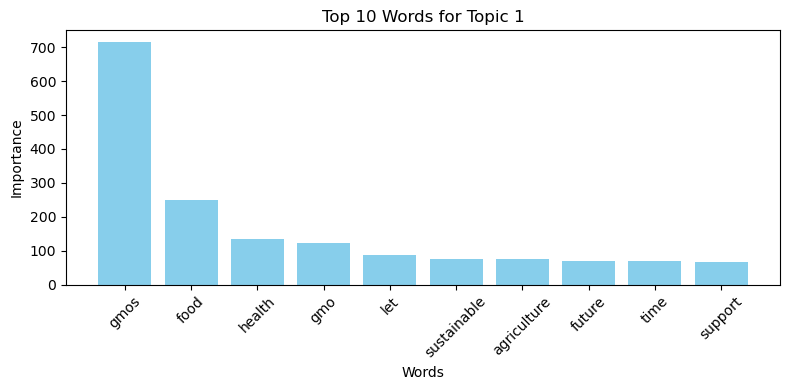

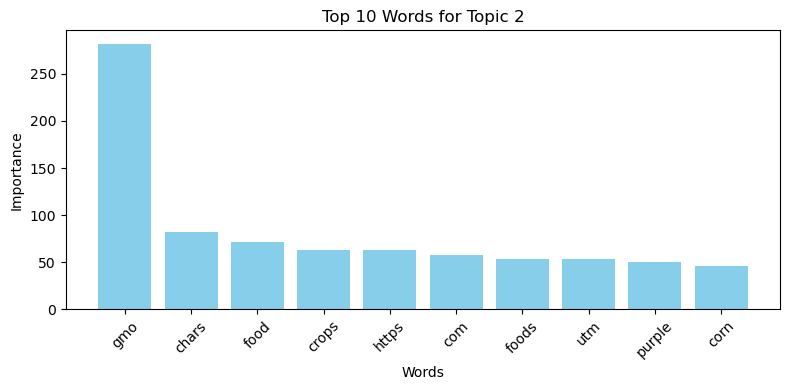

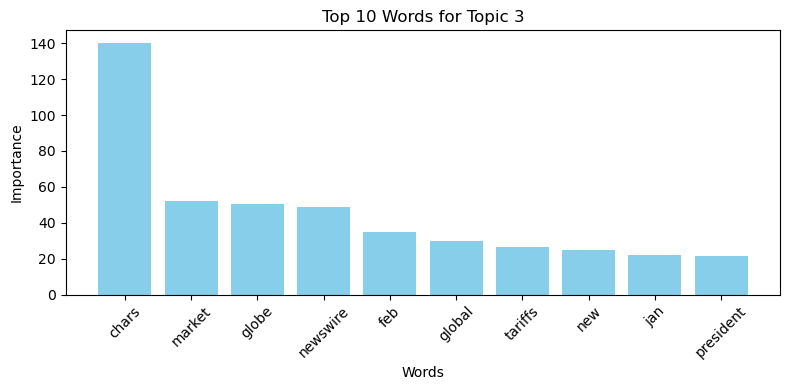

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

df = pd.read_csv("df_clean_text.csv", encoding="utf-8")

vectorizer = CountVectorizer(stop_words="english")
dtm = vectorizer.fit_transform(df["clean_text"])
feature_names = vectorizer.get_feature_names_out()

n_topics = 3 
lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=100, 
                                      learning_method='online', random_state=42)
doc_topic_dist = lda_model.fit_transform(dtm)


print("Topic distribution for the first document:")
print(doc_topic_dist[0])

print("Topic-word distribution (top 10 words per topic):")
for topic_idx, topic in enumerate(lda_model.components_):
    top_indices = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    print(f"Topic {topic_idx+1}: {top_words}")

num_top_words = 10
vocab_array = np.array(feature_names)
for t in range(n_topics):
    topic = lda_model.components_[t]
    top_indices = topic.argsort()[-num_top_words:][::-1]
    top_words = vocab_array[top_indices]
    top_values = topic[top_indices]
    
    plt.figure(figsize=(8, 4))
    plt.bar(top_words, top_values, color='skyblue')
    plt.title(f"Top {num_top_words} Words for Topic {t+1}")
    plt.xlabel("Words")
    plt.ylabel("Importance")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()






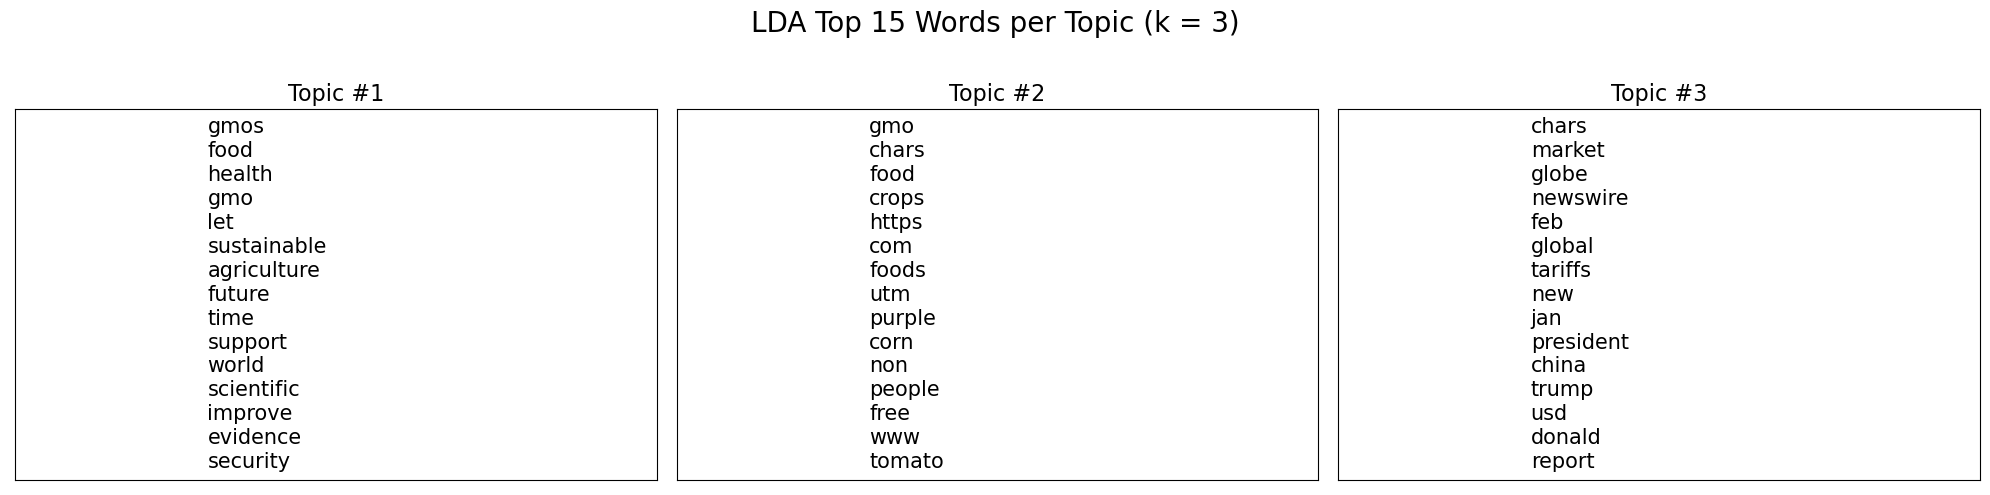

In [ ]:
plt.figure(figsize=(20, 5))
word_topic = np.array(lda_model.components_).transpose()

num_top_words = 15
vocab_array = np.asarray(feature_names)

for t in range(n_topics):
    plt.subplot(1, n_topics, t + 1)
    plt.ylim(0, num_top_words + 0.5)
    plt.xticks([])  
    plt.yticks([])  
    plt.title(f"Topic #{t+1}", fontsize=16)
    
    top_words_idx = np.argsort(word_topic[:, t])[::-1][:num_top_words]
    top_words = vocab_array[top_words_idx]
    
    for i, word in enumerate(top_words):
        plt.text(0.3, num_top_words - i - 0.5, word, fontsize=15)
plt.suptitle(f"LDA Top 15 Words per Topic (k = {n_topics})", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

